In [2]:
# update the pandas package - optional
# !pip install --upgrade pandas


In [1]:
import sqlite3
import sys
import pandas as pd

# Add the hamilton module to your path - optional
# project_dir = "### ADD PATH HERE ###"
# sys.path.append(project_dir)

from hamilton import base, driver
from hamilton.io.materialization import to

In [2]:
# We use the autoreload extension that comes with ipython to automatically reload modules when
# the code in them changes.

# import the jupyter extension
%load_ext autoreload
# set it to only reload the modules imported
%autoreload 1

In [3]:
%%writefile spend_calculations.py
# Define your new Hamilton functions.
# The %%writefile magic command creates a new Python module with the functions below.
# We will import this later and pass it into our Driver.

import pandas as pd
 
# Look at `my_functions` to see how these functions connect.
def avg_3wk_spend(spend: pd.Series) -> pd.Series:
    """Rolling 3 week average spend."""
    return spend.rolling(3).mean()


def spend_per_signup(spend: pd.Series, signups: pd.Series) -> pd.Series:
    """The cost per signup in relation to spend."""
    return spend / signups


def spend_mean(spend: pd.Series) -> float:
    """Shows function creating a scalar. In this case it computes the mean of the entire column."""
    return spend.mean()


def spend_zero_mean(spend: pd.Series, spend_mean: float) -> pd.Series:
    """Shows function that takes a scalar. In this case to zero mean spend."""
    return spend - spend_mean


def spend_std_dev(spend: pd.Series) -> float:
    """Function that computes the standard deviation of the spend column."""
    return spend.std()


def spend_zero_mean_unit_variance(spend_zero_mean: pd.Series, spend_std_dev: float) -> pd.Series:
    """Function showing one way to make spend have zero mean and unit variance."""
    return spend_zero_mean / spend_std_dev

Overwriting spend_calculations.py


In [4]:
initial_columns = {  # load from actuals or wherever -- this is our initial data we use as input.
    # Note: these values don't have to be all series, they could be a scalar.
    "signups": pd.Series([1, 10, 50, 100, 200, 400]),
    "spend": pd.Series([10, 10, 20, 40, 40, 50]),
}

In [5]:
%aimport spend_calculations

df_builder = base.PandasDataFrameResult()
dr = driver.Driver({}, spend_calculations)  # can pass in multiple modules

In [6]:
# we need to specify what we want in the final dataframe. These can be string names, or function references.
output_columns = [
    "spend",
    "signups",
    "avg_3wk_spend",
    "spend_per_signup",
    "spend_zero_mean_unit_variance",
]

In [7]:
# set up db connection for sql materializer below
conn = sqlite3.connect("df.db")

# remove an previous instances of the 'test' table that will be created next
conn.cursor().execute("DROP TABLE IF EXISTS test;")
conn.commit()

More than one applicable adapter detected for <class 'pandas.core.frame.DataFrame'>. Using the last one registered <class 'hamilton.plugins.pandas_extensions.PandasPickleWriter'>.


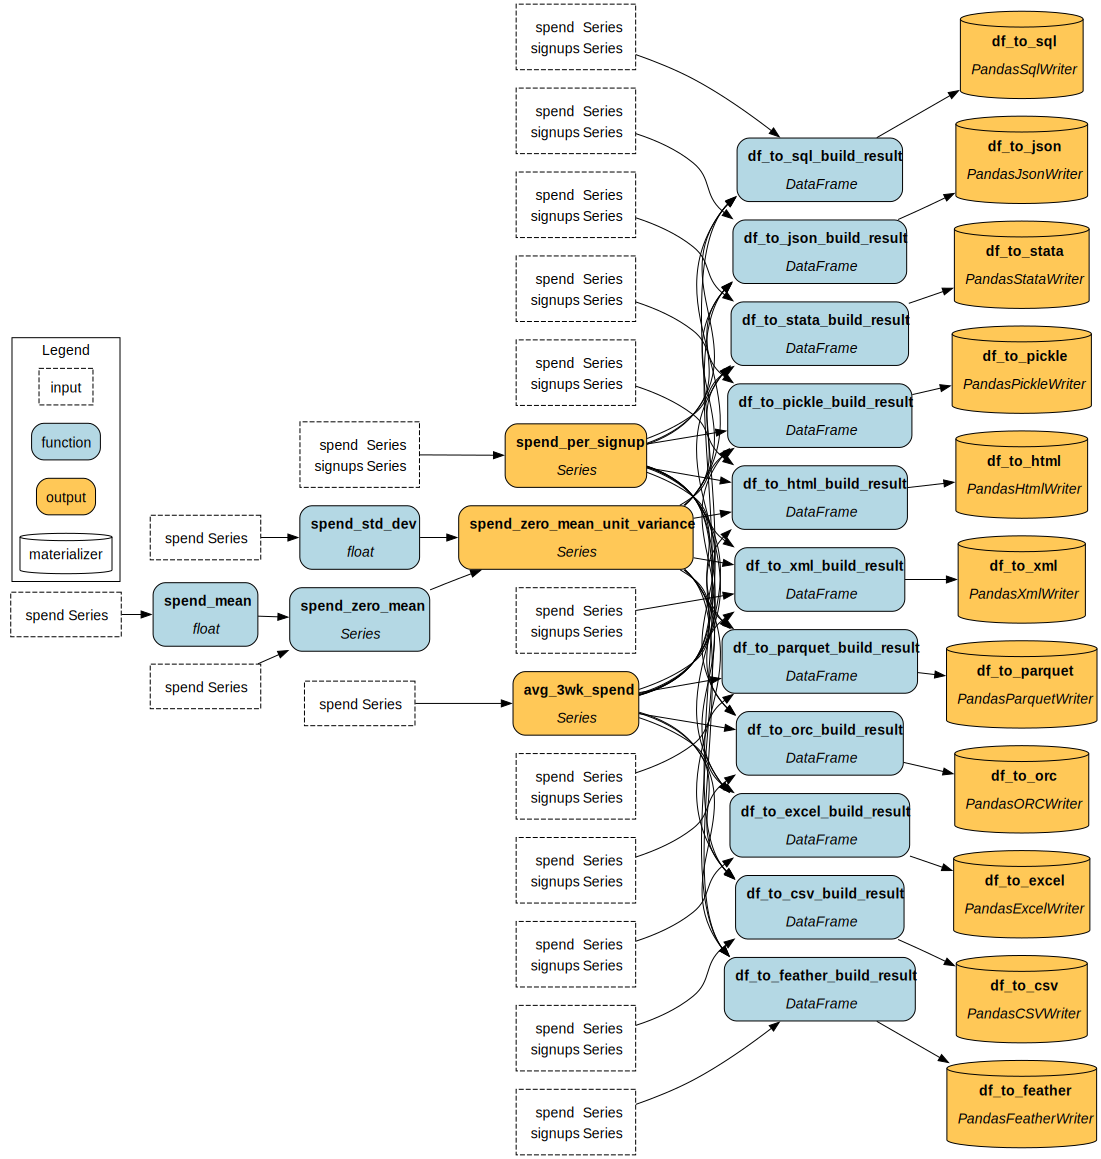

In [8]:
materializers = [
    # materialize the dataframe to a pickle file
    to.pickle(
        dependencies=output_columns,
        id="df_to_pickle",
        path="./df.pkl",
        combine=df_builder,
    ),
    # materialize the dataframe to a JSON file
    to.json(
        dependencies=output_columns,
        id="df_to_json",
        filepath_or_buffer="./df.json",
        combine=df_builder,
    ),
    to.sql(
        dependencies=output_columns,
        id="df_to_sql",
        table_name="test",
        db_connection=conn,
        combine=df_builder,
    ),
    # materialize the dataframe to a XML file
    to.xml(
        dependencies=output_columns,
        id="df_to_xml",
        path_or_buffer="./df.xml",
        combine=df_builder,
    ),
    to.html(
        dependencies=output_columns,
        id="df_to_html",
        buf="./df.html",
        combine=df_builder,
    ),
    to.stata(
        dependencies=output_columns,
        id="df_to_stata",
        path="./df.dta",
        combine=df_builder,
    ),
    to.feather(
        dependencies=output_columns,
        id="df_to_feather",
        path="./df.feather",
        combine=df_builder,
    ),
    to.parquet(
        dependencies=output_columns,
        id="df_to_parquet",
        path="./df.parquet.gzip",
        combine=df_builder,
    ),
    to.csv(
        dependencies=output_columns,
        id="df_to_csv",
        path="./df.csv",
        combine=df_builder,
    ),
    to.orc(
        dependencies=output_columns,
        id="df_to_orc",
        path="./df.orc",
        combine=df_builder,
    ),
    to.excel(
        dependencies=output_columns,
        id="df_to_excel",
        path="./df.xlsx",
        combine=df_builder,
    ),
]
# Visualize what is happening
dr.visualize_materialization(
    *materializers,
    additional_vars=output_columns,
    inputs=initial_columns,
)

In [9]:
# Materialize a result, i.e. execute the DAG!
materialization_results, additional_outputs = dr.materialize(
    *materializers,
    additional_vars=[
        "df_to_pickle_build_result",
        "df_to_json_build_result",
        "df_to_sql_build_result",
        "df_to_xml_build_result",
        "df_to_html_build_result",
        "df_to_stata_build_result",
        "df_to_feather_build_result",
        "df_to_parquet_build_result",
        "df_to_csv_build_result",
        "df_to_orc_build_result",
        "df_to_excel_build_result",
    ],  # because combine is used, we can get that result here.
    inputs=initial_columns,
)

More than one applicable adapter detected for <class 'pandas.core.frame.DataFrame'>. Using the last one registered <class 'hamilton.plugins.pandas_extensions.PandasPickleWriter'>.


In [10]:
materialization_results

{'df_to_pickle': {'file_metadata': {'size': 1088,
   'path': './df.pkl',
   'last_modified': 1707261374.0912328,
   'timestamp': 1707257774.091604},
  'dataframe_metadata': {'rows': 6,
   'columns': 5,
   'column_names': ['spend',
    'signups',
    'avg_3wk_spend',
    'spend_per_signup',
    'spend_zero_mean_unit_variance'],
   'datatypes': ['int64', 'int64', 'float64', 'float64', 'float64']}},
 'df_to_json': {'file_metadata': {'size': 428,
   'path': './df.json',
   'last_modified': 1707261374.0931628,
   'timestamp': 1707257774.093234},
  'dataframe_metadata': {'rows': 6,
   'columns': 5,
   'column_names': ['spend',
    'signups',
    'avg_3wk_spend',
    'spend_per_signup',
    'spend_zero_mean_unit_variance'],
   'datatypes': ['int64', 'int64', 'float64', 'float64', 'float64']}},
 'df_to_sql': {'sql_metadata': {'rows': 6,
   'query': None,
   'table_name': 'test',
   'timestamp': 1707257774.096384},
  'dataframe_metadata': {'rows': 6,
   'columns': 5,
   'column_names': ['spend'

In [11]:
additional_outputs["df_to_pickle_build_result"]

spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934

In [12]:
additional_outputs["df_to_json_build_result"]

spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934

In [13]:
print(additional_outputs["df_to_sql_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [14]:
print(additional_outputs["df_to_xml_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [15]:
print(additional_outputs["df_to_html_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [16]:
print(additional_outputs["df_to_stata_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [17]:
print(additional_outputs["df_to_feather_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [18]:
print(additional_outputs["df_to_parquet_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [19]:
print(additional_outputs["df_to_csv_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [20]:
print(additional_outputs["df_to_orc_build_result"])

   spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934  


In [21]:
additional_outputs["df_to_excel_build_result"]

spend  signups  avg_3wk_spend  spend_per_signup  \
0     10        1            NaN            10.000   
1     10       10            NaN             1.000   
2     20       50      13.333333             0.400   
3     40      100      23.333333             0.400   
4     40      200      33.333333             0.200   
5     50      400      43.333333             0.125   

   spend_zero_mean_unit_variance  
0                      -1.064405  
1                      -1.064405  
2                      -0.483821  
3                       0.677349  
4                       0.677349  
5                       1.257934

In [22]:
# closing out db connection
conn.close()